## 1. Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams
import string
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

- #### This section imports the necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), text processing (nltk, wordcloud), machine learning (sklearn), and handling imbalanced datasets (imblearn).
- #### Downloads NLTK stopwords and tokenizer models.

## 2. Load and Preview the Dataset

In [2]:
df = pd.read_csv('cleaned_reviews.csv')
print(df.head())

                                             Content  Rating
0                             Great quality product.     5.0
1  The product arrived quickly, but the package w...     3.0
2  He is doing fine and is not bad, but with a ba...     4.0
3               Cospa is also good for overclocking.     5.0
4  No complaints here. It handles everything my g...     5.0


- #### Loads the dataset from a CSV file.
- #### Displays the first few rows of the dataset to understand its structure.

## 3. Label Sentiments Based on Ratings

In [3]:
def sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(sentiment_label)

- #### Defines a function to label sentiments based on ratings.
- #### Adds a new column 'Sentiment' to the DataFrame based on the rating.

## 4. Text Preprocessing

In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Cleaned_Content'] = df['Content'].apply(preprocess_text)
print(df.head())

                                             Content  Rating Sentiment  \
0                             Great quality product.     5.0  Positive   
1  The product arrived quickly, but the package w...     3.0   Neutral   
2  He is doing fine and is not bad, but with a ba...     4.0  Positive   
3               Cospa is also good for overclocking.     5.0  Positive   
4  No complaints here. It handles everything my g...     5.0  Positive   

                                     Cleaned_Content  
0                              great quality product  
1  product arrived quickly package good condition...  
2  fine bad barely identical computer cpu brand g...  
3                       cospa also good overclocking  
4  complaints handles everything gaming pc throws...  


- #### Defines a function to preprocess the text (convert to lowercase, tokenize, remove non-alphanumeric characters, and remove stopwords).
- #### Applies this function to the 'Content' column and creates a new column 'Cleaned_Content'.

## 5. Vectorize Text Data

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Content'])
y = df['Sentiment']

- #### Converts the preprocessed text data into TF-IDF features for model training.

## 6. Encode Target Labels

In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

- #### Encodes the sentiment labels into numerical values.

## 7. Split the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

- #### plits the data into training and test sets.

## 8. Handle Class Imbalance with SMOTE

In [21]:
class_distribution_before = Counter(y_train)
print("Class distribution before SMOTE:")
print(f"Positive class: {class_distribution_before[2]} instances")
print(f"Neutral class: {class_distribution_before[1]} instances")
print(f"Negative class: {class_distribution_before[0]} instances")

# Handling class imbalance
smote = SMOTE(random_state=42, k_neighbors=4)  # Adjust k_neighbors based on your data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

class_distribution_after = Counter(y_train_smote)
print("\nClass distribution after SMOTE:")
print(f"Positive class: {class_distribution_after[2]} instances")
print(f"Neutral class: {class_distribution_after[1]} instances")
print(f"Negative class: {class_distribution_after[0]} instances")

Class distribution before SMOTE:
Positive class: 568 instances
Neutral class: 5 instances
Negative class: 15 instances

Class distribution after SMOTE:
Positive class: 568 instances
Neutral class: 568 instances
Negative class: 568 instances


- #### Prints the class distribution before SMOTE.
- #### Applies SMOTE to handle class imbalance by generating synthetic samples.
- #### Prints the class distribution after SMOTE.

## 9. Plot Rating and Sentiment Distributions

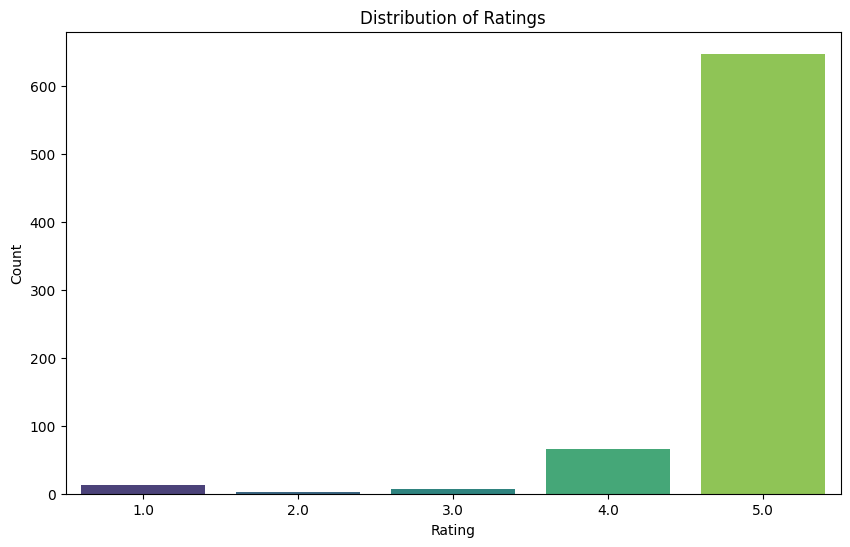

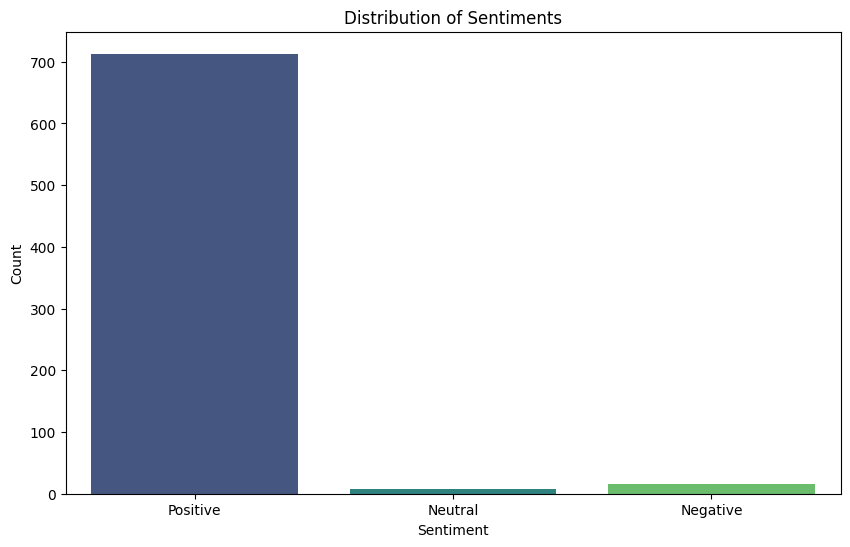

In [11]:
def plot_rating_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Rating', palette='viridis')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

plot_rating_distribution(df)

def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Sentiment', palette='viridis')
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

plot_sentiment_distribution(df)

- #### Defines functions to plot the distribution of ratings and sentiments.
- #### Plots these distributions to visualize the data.

## 10. Plot N-grams

In [12]:
def plot_ngrams(text, n=1, top_k=20, title='N-grams'):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    n_grams = ngrams(tokens, n)
    n_gram_freq = Counter(n_grams)
    common_ngrams = n_gram_freq.most_common(top_k)
    ngram_df = pd.DataFrame(common_ngrams, columns=['N-gram', 'Frequency'])
    ngram_df['N-gram'] = ngram_df['N-gram'].apply(lambda x: ' '.join(x))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='viridis')
    plt.title(title)
    plt.show()

- #### Defines a function to plot the top n-grams (unigrams or bigrams) for the given text.

## 11. Generate and Plot N-grams

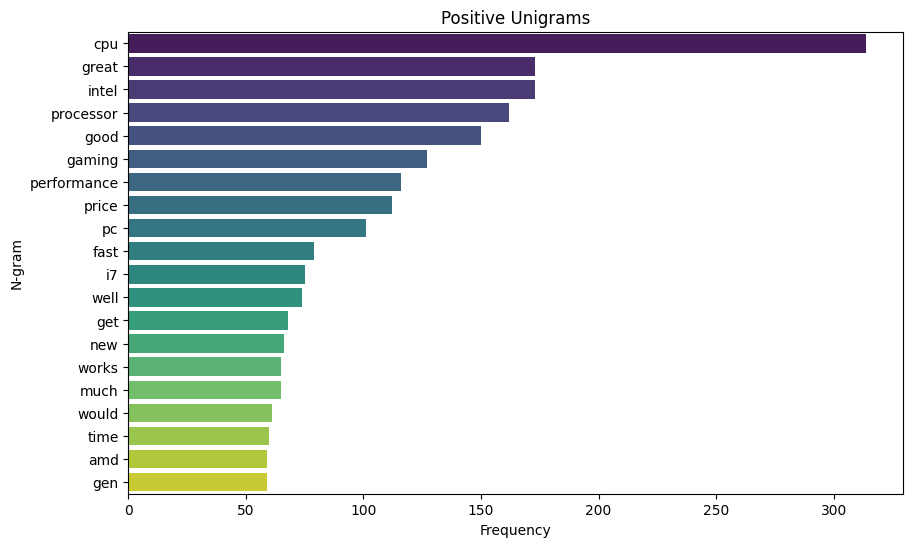

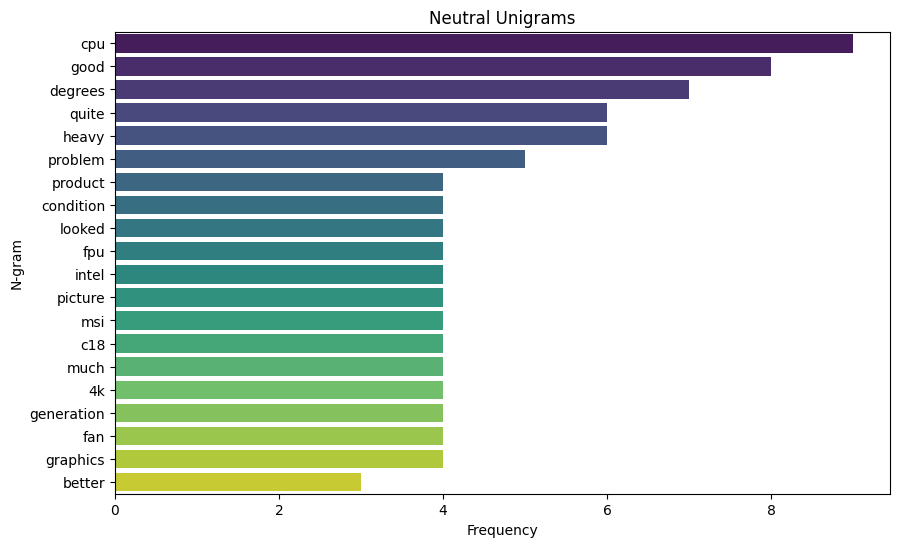

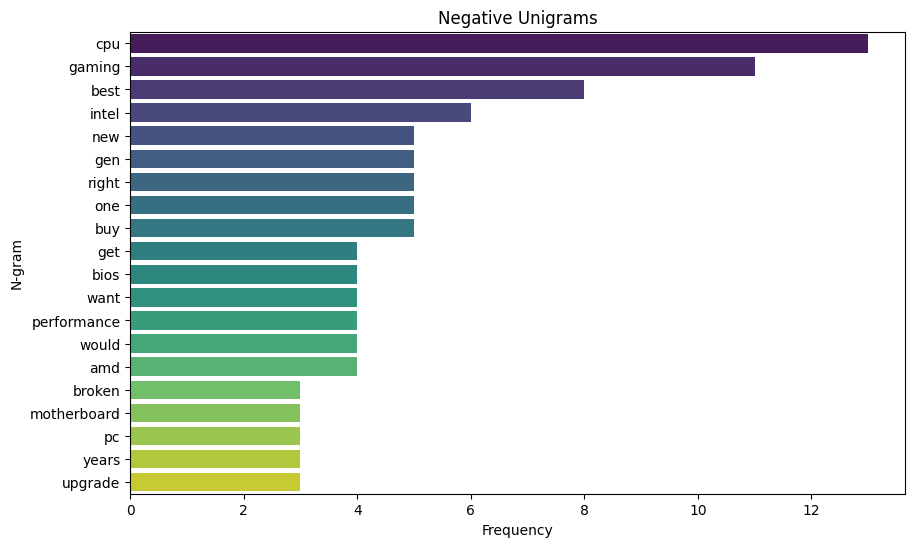

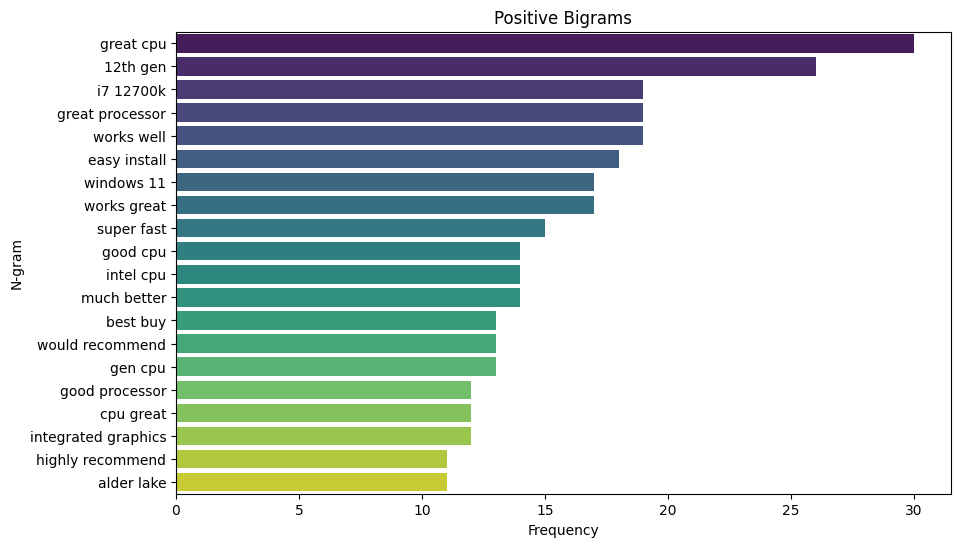

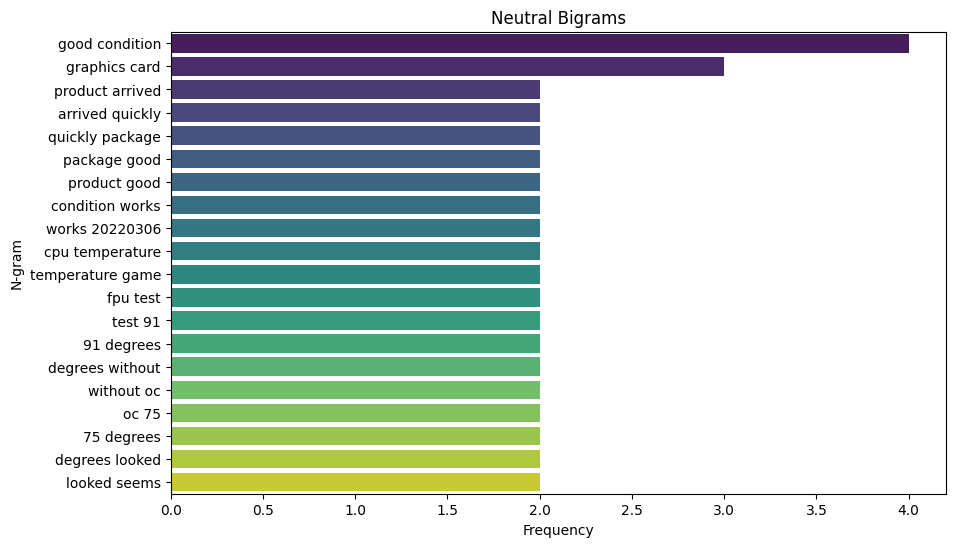

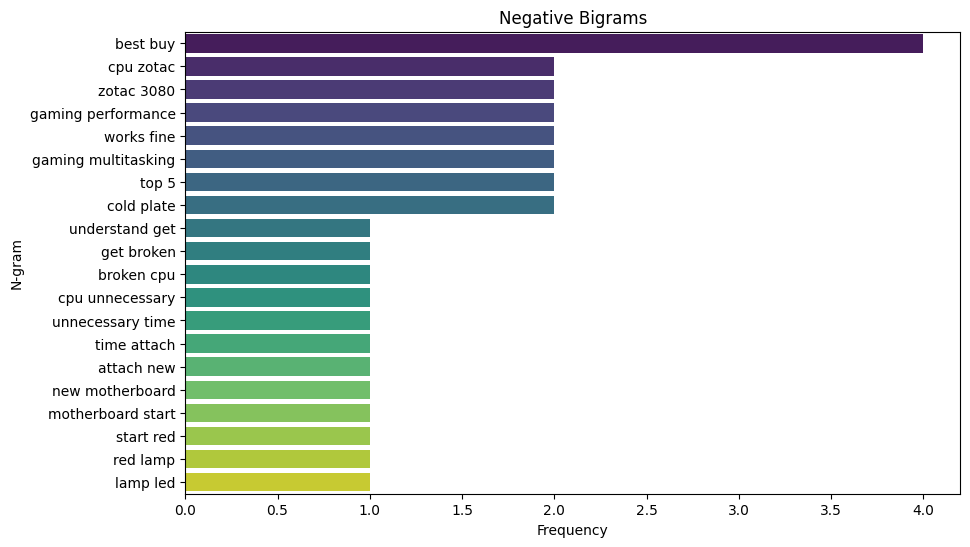

In [13]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Content'])
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Cleaned_Content'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_Content'])

# Unigrams for Positive, Neutral, Negative
plot_ngrams(positive_text, n=1, top_k=20, title='Positive Unigrams')
plot_ngrams(neutral_text, n=1, top_k=20, title='Neutral Unigrams')
plot_ngrams(negative_text, n=1, top_k=20, title='Negative Unigrams')

# Bigrams for Positive, Neutral, Negative
plot_ngrams(positive_text, n=2, top_k=20, title='Positive Bigrams')
plot_ngrams(neutral_text, n=2, top_k=20, title='Neutral Bigrams')
plot_ngrams(negative_text, n=2, top_k=20, title='Negative Bigrams')

- #### Combines all positive, neutral, and negative texts.
- #### Plots the top 20 unigrams and bigrams for each sentiment.

## 12. Create Word Clouds

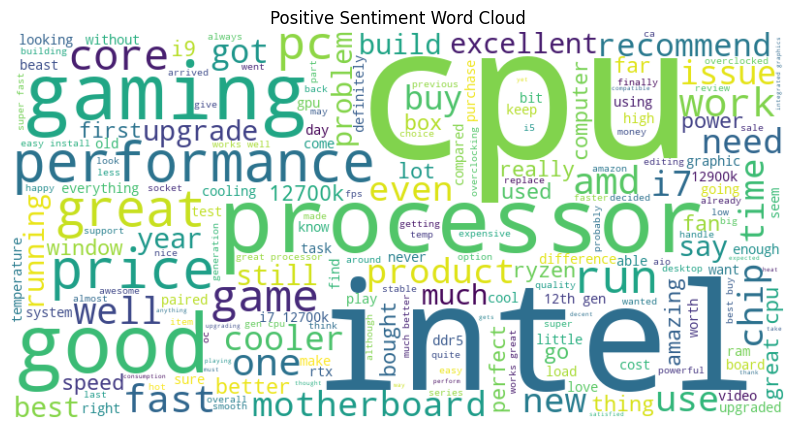

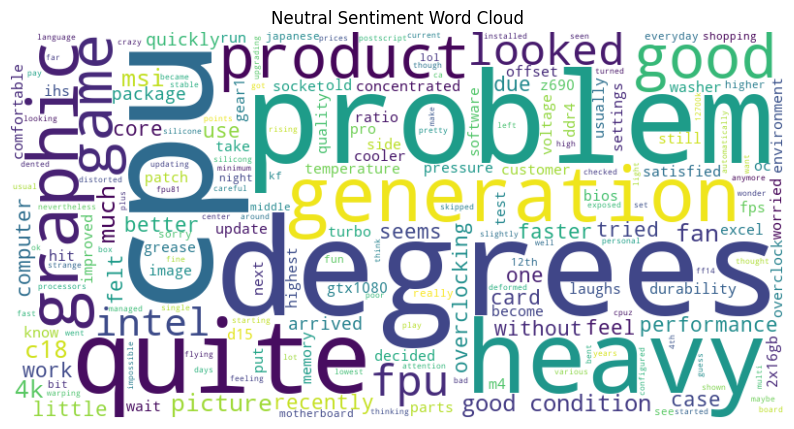

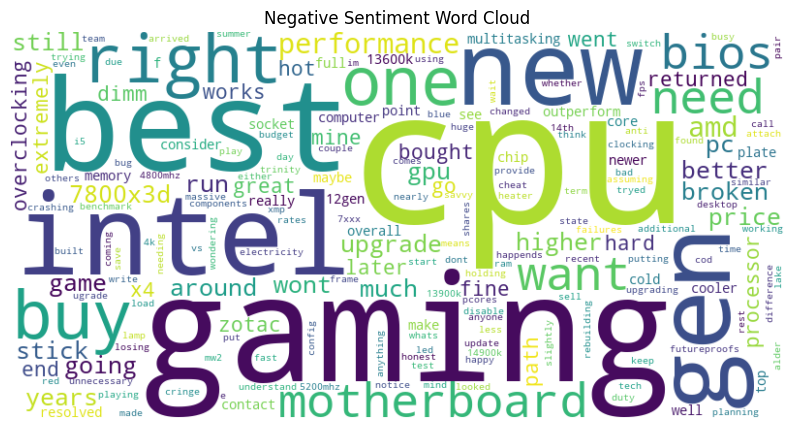

In [14]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

create_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
create_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')
create_wordcloud(negative_text, 'Negative Sentiment Word Cloud')

- #### Defines a function to create and display word clouds for the given text.

## 13. Define, Train, and Evaluate the Model

In [15]:
model = LogisticRegression()

model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Logistic Regression Classification Report:\n {classification_report(y_test, y_pred, target_names=le.classes_)}')
print(f'Logistic Regression Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Logistic Regression Accuracy: 0.9797297297297297
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.50      0.50      0.50         2
    Positive       0.99      0.99      0.99       145

    accuracy                           0.98       148
   macro avg       0.50      0.50      0.50       148
weighted avg       0.97      0.98      0.98       148

Logistic Regression Confusion Matrix:
 [[  0   0   1]
 [  0   1   1]
 [  0   1 144]]


- #### Defines a logistic regression model.
- #### Trains the model on the SMOTE-adjusted training data.
- #### Predicts the test data and evaluates the model performance.

## 14. Grid Search for Hyperparameter Tuning

In [16]:
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)
print(f'Best parameters for Logistic Regression: {grid_search.best_params_}')
print(f'Best cross-validation score for Logistic Regression: {grid_search.best_score_}')

Best parameters for Logistic Regression: {'C': 10}
Best cross-validation score for Logistic Regression: 0.9976522339140935


- #### Performs grid search to find the best hyperparameters for the logistic regression model.
- #### Prints the best parameters and cross-validation score.

## 15. Final Evaluation with Best Model

In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model: {best_model}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=le.classes_)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Best Model: LogisticRegression(C=10)
Accuracy: 0.9797297297297297
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.50      0.50      0.50         2
    Positive       0.99      0.99      0.99       145

    accuracy                           0.98       148
   macro avg       0.50      0.50      0.50       148
weighted avg       0.97      0.98      0.98       148

Confusion Matrix:
 [[  0   0   1]
 [  0   1   1]
 [  0   1 144]]


- #### Evaluates the test set using the best model from grid search.

## 16. Visualize Confusion Matrix and Classification Report

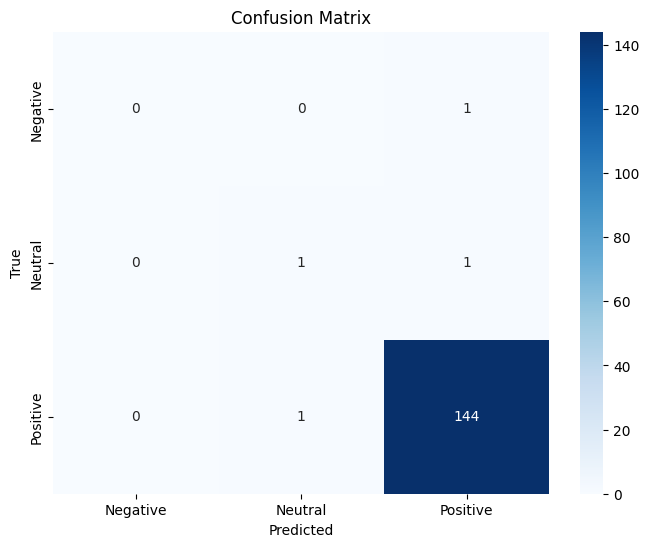

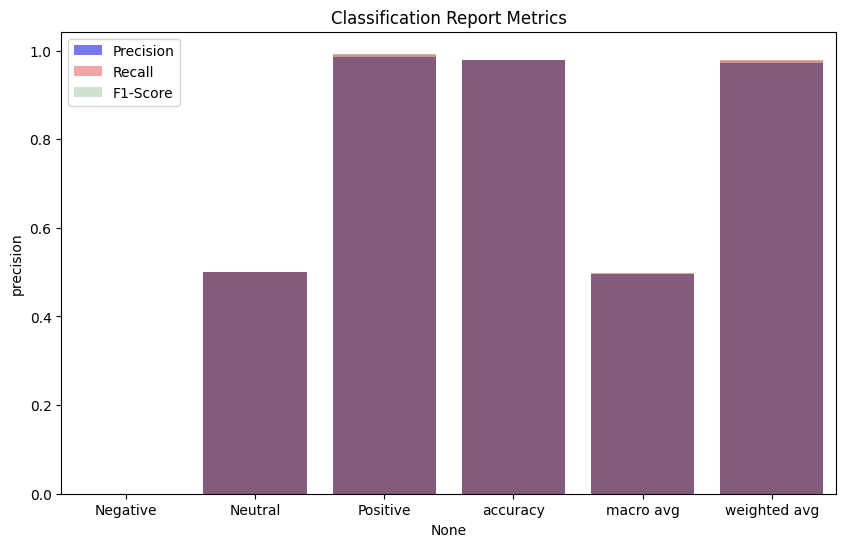

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

report_data = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()

plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['precision'], color='b', alpha=0.6, label='Precision')
sns.barplot(x=report_df.index, y=report_df['recall'], color='r', alpha=0.4, label='Recall')
sns.barplot(x=report_df.index, y=report_df['f1-score'], color='g', alpha=0.2, label='F1-Score')
plt.title('Classification Report Metrics')
plt.legend(loc='upper left')
plt.show()

- #### Visualizes the confusion matrix and the precision, recall, and F1-score for each class.